# Covid_19 dataset EDA

In [1]:
# import necessary packages first
# For data manipulation
import pandas as pd
import numpy as np
import zipfile

# For data visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

In [3]:
covid = pd.read_csv('/Users/rufen/Downloads/data_project2_covid/covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## check data and prepare data for EDA

In [4]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [5]:
covid.shape

(306429, 8)

In [6]:
covid.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [7]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [8]:
#change data type
covid['ObservationDate'] = covid['ObservationDate'].astype('datetime64')
#covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [9]:
# calculate the unique value 
covid['ObservationDate'].nunique()

494

In [10]:
covid["Last Update"].nunique()

1905

In [11]:
#analyze the dataset based on the unit of day is enough, we can drop 'Last Update' column
covid.drop(columns='Last Update', inplace=True)
covid.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0


In [12]:
covid['Deathrat'] = covid['Deaths']/covid['Confirmed']
covid['Recoveredrat'] = covid['Recovered']/covid['Confirmed']
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Deathrat,Recoveredrat
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,NaN,NaN


In [13]:
#dealing with the missing values 
covid.isna().mean()

SNo                0.000000
ObservationDate    0.000000
Province/State     0.254871
Country/Region     0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Deathrat           0.014114
Recoveredrat       0.012176
dtype: float64

In [14]:
covid = covid.fillna(0).round(2)

In [15]:
covid.isnull().mean()

SNo                0.0
ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
Deathrat           0.0
Recoveredrat       0.0
dtype: float64

In [16]:
covid.head(100)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Deathrat,Recoveredrat
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.00,0.00
5,6,2020-01-22,Guangdong,Mainland China,26.0,0.0,0.0,0.00,0.00
6,7,2020-01-22,Guangxi,Mainland China,2.0,0.0,0.0,0.00,0.00
7,8,2020-01-22,Guizhou,Mainland China,1.0,0.0,0.0,0.00,0.00
8,9,2020-01-22,Hainan,Mainland China,4.0,0.0,0.0,0.00,0.00
9,10,2020-01-22,Hebei,Mainland China,1.0,0.0,0.0,0.00,0.00


In [32]:
#we need to see errors in country/region, province/state these two columns
covid['Country/Region'].unique()

In [15]:
#we only have 195 countries in the world, this is weird, we need to find the errors and eplace them
print(f"there are {covid['Country/Region'].nunique()} unique countries.")

there are 229 unique countries.


In [48]:
'Bahamas, The','Gambia, The','Channel Islands','('St. Martin')'
#i pick these values out from the cocid_1, and i will delete these rows 
#covid = df[~df['Country/Region'].str.contains('Bahamas, The','Gambia, The','Channel Islands','St. Martin')] can only use one word here, so this code is wrong
covid = df[~df['Country/Region'].isin(['Bahamas, The', 'Gambia, The', 'Channel Islands', 'St. Martin'])]

SyntaxError: invalid syntax (2801605739.py, line 1)

## EDA, find intersting insights

In [20]:
#the top 50 death rate countries, find the average rate for each country first
covid_1 =covid.groupby('Country/Region')['Deathrat','Recoveredrat'].mean().sort_values(by ='Deathrat',ascending=False)
covid_1

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_67046/590259734.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_1 =covid.groupby('Country/Region')['Deathrat','Recoveredrat'].mean().sort_values(by ='Deathrat',ascending=False)


,Deathrat,Recoveredrat
Country/Region,,
Yemen,0.246675,0.475325
MS Zaandam,0.217944,0.324393
Belgium,0.126502,0.023674
Mexico,0.105151,NaN
Ecuador,0.061846,0.642923
Hungary,0.061681,0.480907
Italy,0.059880,0.722423
Syria,0.057834,0.448226
Chad,0.056178,0.760549


Text(0, 0.5, 'Death Rate')

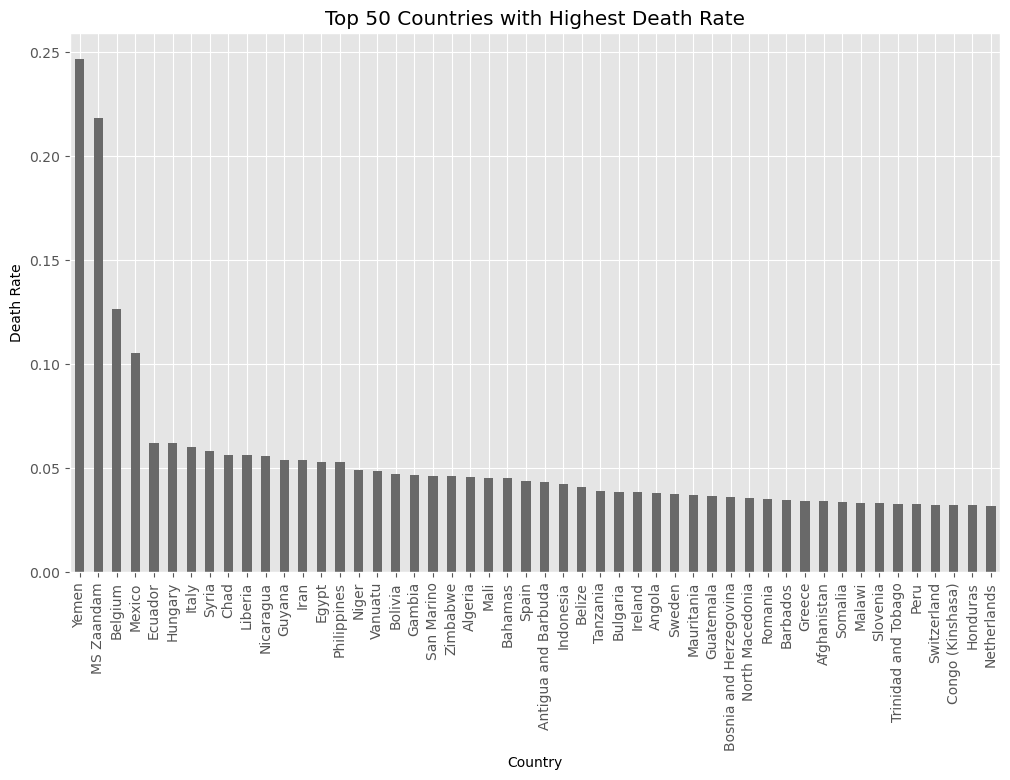

In [31]:
# plt.figure(figsize=(12,7))
# covid_2 = covid.groupby('Country/Region')['Deathrat'].mean().head(50).sort_values(ascending=False)
# covid_2.plot(kind='bar',color='#696969')
# plt.title('the top 50 death rate countries')
plt.figure(figsize=(12, 7))
covid_2 = covid.groupby('Country/Region')['Deathrat'].mean().sort_values(ascending=False)
covid_2.head(50).plot(kind='bar', color='#696969')
plt.title('Top 50 Countries with Highest Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate')

Text(0, 0.5, 'Death Rate')

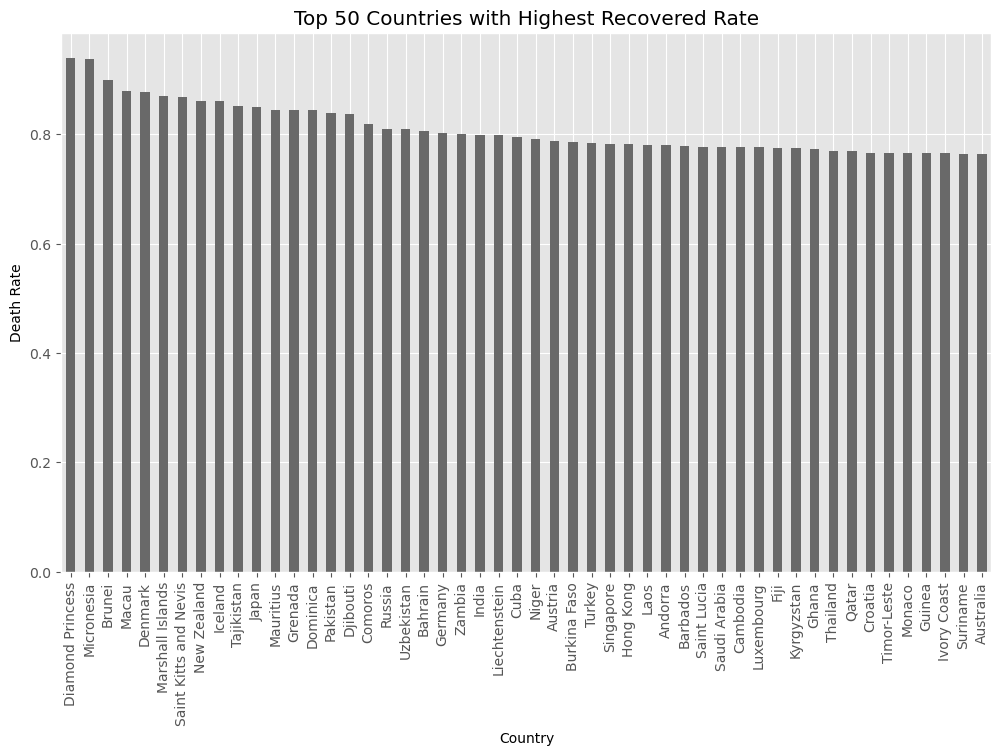

In [34]:
plt.figure(figsize=(12, 7))
covid_3 = covid.groupby('Country/Region')['Recoveredrat'].mean().sort_values(ascending=False)
covid_3.head(50).plot(kind='bar', color='#696969')
plt.title('Top 50 Countries with Highest Recovered Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate')

In [37]:
covid_china= covid[covid['Country/Region']=="Mainland China"]
covid_china

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Deathrat,Recoveredrat
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
306340,306341,2021-05-29,Tibet,Mainland China,1.0,0.0,1.0,0.00,1.00
306368,306369,2021-05-29,Unknown,Mainland China,0.0,0.0,10.0,0.00,inf
306412,306413,2021-05-29,Xinjiang,Mainland China,980.0,3.0,977.0,0.00,1.00
306420,306421,2021-05-29,Yunnan,Mainland China,352.0,2.0,331.0,0.01,0.94


In [39]:
covid_china = covid_china.drop('SNo', axis=1)

In [66]:
covid_china['Province/State'].value_counts()

Gansu             496
Hebei             495
Hubei             495
Anhui             494
Ningxia           494
Qinghai           494
Shaanxi           494
Shandong          494
Shanghai          494
Shanxi            494
Jilin             494
Sichuan           494
Tianjin           494
Xinjiang          494
Yunnan            494
Zhejiang          494
Liaoning          494
Jiangxi           494
Beijing           494
Jiangsu           494
Inner Mongolia    494
Hunan             494
Henan             494
Heilongjiang      494
Hainan            494
Guizhou           494
Guangxi           494
Guangdong         494
Fujian            494
Chongqing         494
Tibet             488
Unknown           446
Name: Province/State, dtype: int64

In [67]:
covid_china['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Unknown'], dtype=object)

### Analyze the rate change in every province of China 

In [48]:
covid_hubei = covid_china[covid_china['Province/State']== 'Hubei']
covid_hubei

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Deathrat,Recoveredrat
13,2020-01-22,Hubei,Mainland China,444.0,17.0,28.0,0.04,0.06
49,2020-01-23,Hubei,Mainland China,444.0,17.0,28.0,0.04,0.06
53,2020-01-23,Hubei,Mainland China,444.0,17.0,28.0,0.04,0.06
88,2020-01-24,Hubei,Mainland China,549.0,24.0,31.0,0.04,0.06
131,2020-01-25,Hubei,Mainland China,761.0,40.0,32.0,0.05,0.04
177,2020-01-26,Hubei,Mainland China,1058.0,52.0,42.0,0.05,0.04
226,2020-01-27,Hubei,Mainland China,1423.0,76.0,45.0,0.05,0.03
279,2020-01-28,Hubei,Mainland China,3554.0,125.0,80.0,0.04,0.02
333,2020-01-29,Hubei,Mainland China,3554.0,125.0,88.0,0.04,0.02
389,2020-01-30,Hubei,Mainland China,4903.0,162.0,90.0,0.03,0.02


Text(0.5, 1.0, 'Hubei province Recovered VS Death rate')

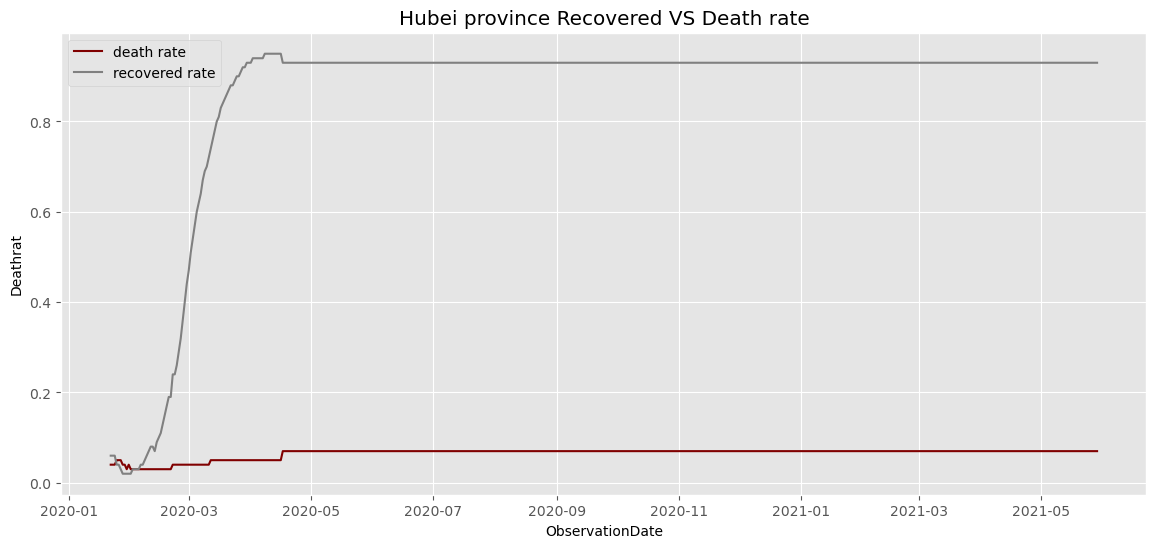

In [73]:
plt.figure(figsize=(14,6))

sns.lineplot(data=covid_hubei, x='ObservationDate', y='Deathrat', color="#800000", label="death rate")

sns.lineplot(data=covid_hubei, x='ObservationDate', y='Recoveredrat', color="#808080", label = "recovered rate")
plt.title("Hubei province Recovered VS Death rate")

### the terning point appeared at 2020.04,  for both the death rate and recovered rate. you cna use the same method to analyze other places

In [62]:
covid_beijing = covid_china[covid_china['Province/State']== 'Beijing']
covid_beijing

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Deathrat,Recoveredrat
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,0.00,0.00
41,2020-01-23,Beijing,Mainland China,22.0,0.0,0.0,0.00,0.00
91,2020-01-24,Beijing,Mainland China,36.0,0.0,1.0,0.00,0.03
136,2020-01-25,Beijing,Mainland China,41.0,0.0,2.0,0.00,0.05
183,2020-01-26,Beijing,Mainland China,68.0,0.0,2.0,0.00,0.03
232,2020-01-27,Beijing,Mainland China,80.0,1.0,2.0,0.01,0.02
288,2020-01-28,Beijing,Mainland China,91.0,1.0,4.0,0.01,0.04
341,2020-01-29,Beijing,Mainland China,111.0,1.0,4.0,0.01,0.04
400,2020-01-30,Beijing,Mainland China,114.0,1.0,4.0,0.01,0.04
460,2020-01-31,Beijing,Mainland China,139.0,1.0,5.0,0.01,0.04


Text(0.5, 1.0, 'Beijing Recovered VS Death rate')

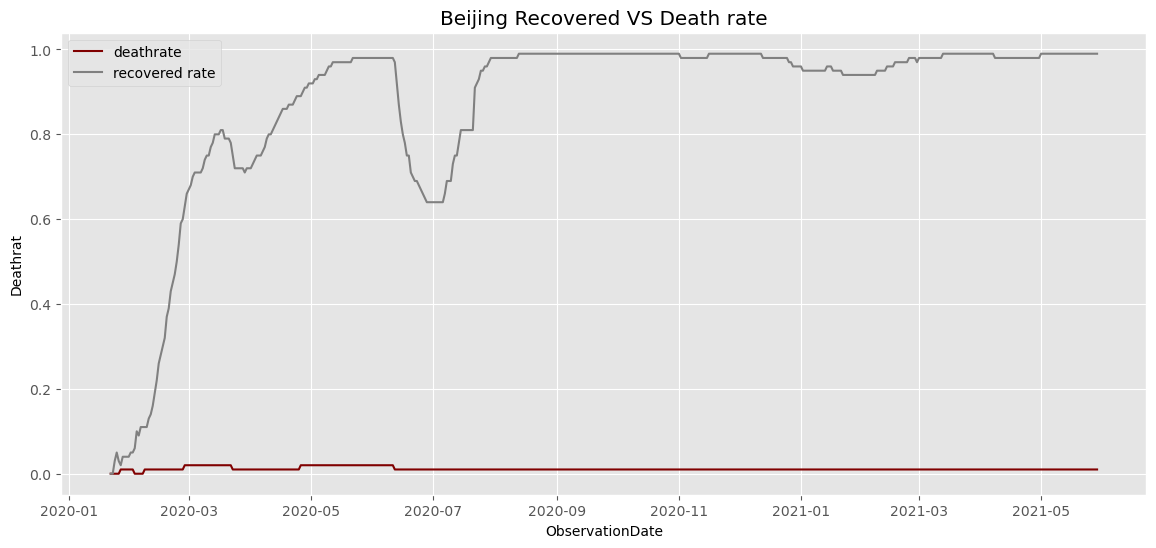

In [72]:
plt.figure(figsize=(14,6))

sns.lineplot(data=covid_beijing, x='ObservationDate', y='Deathrat', color="#800000", label="deathrate")

sns.lineplot(data=covid_beijing, x='ObservationDate', y='Recoveredrat', color="#808080",label="recovered rate")
plt.title("Beijing Recovered VS Death rate")

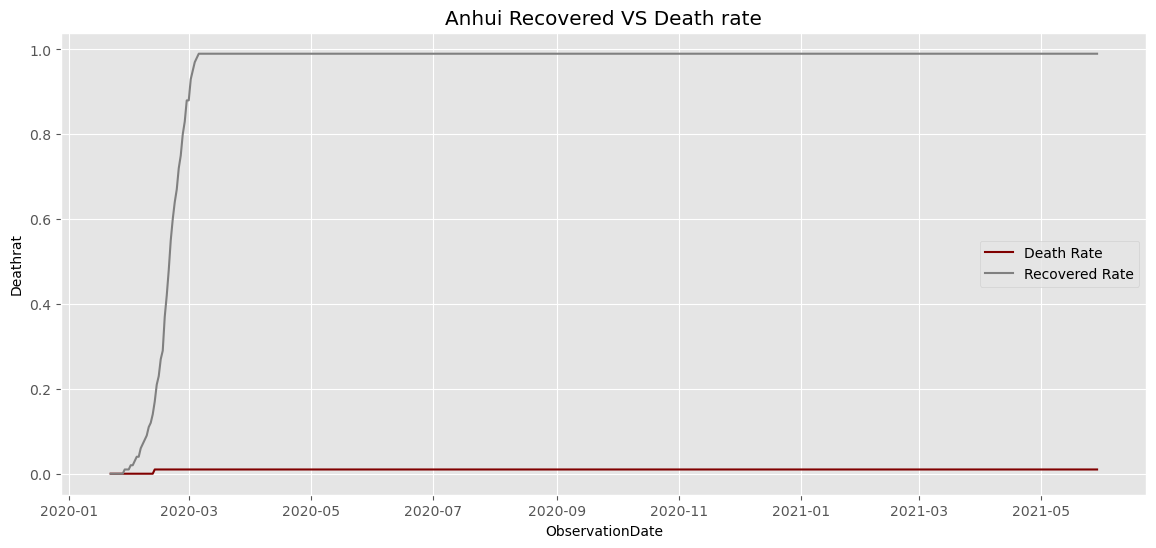

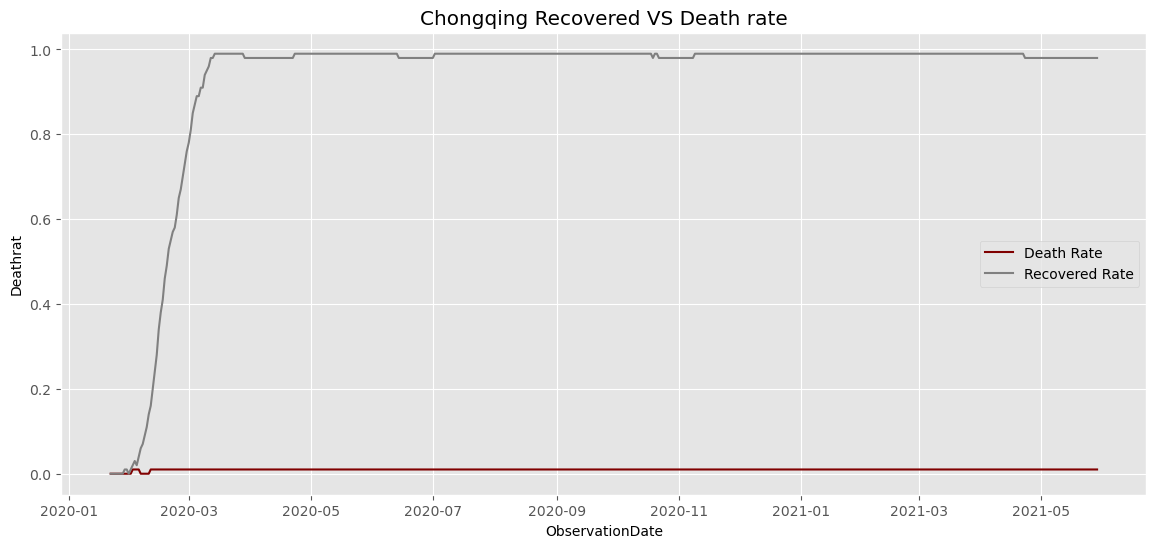

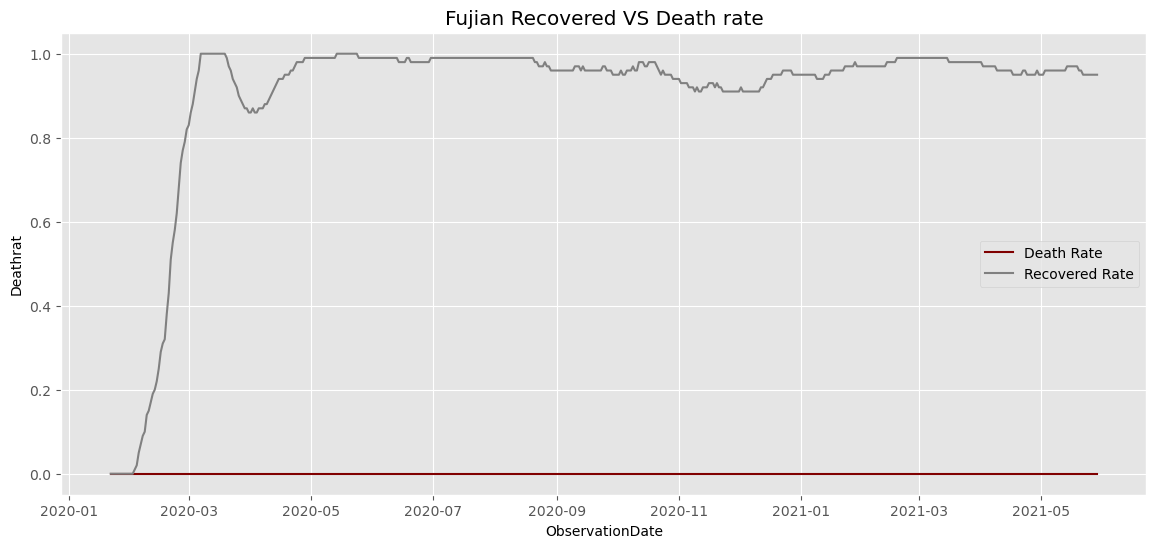

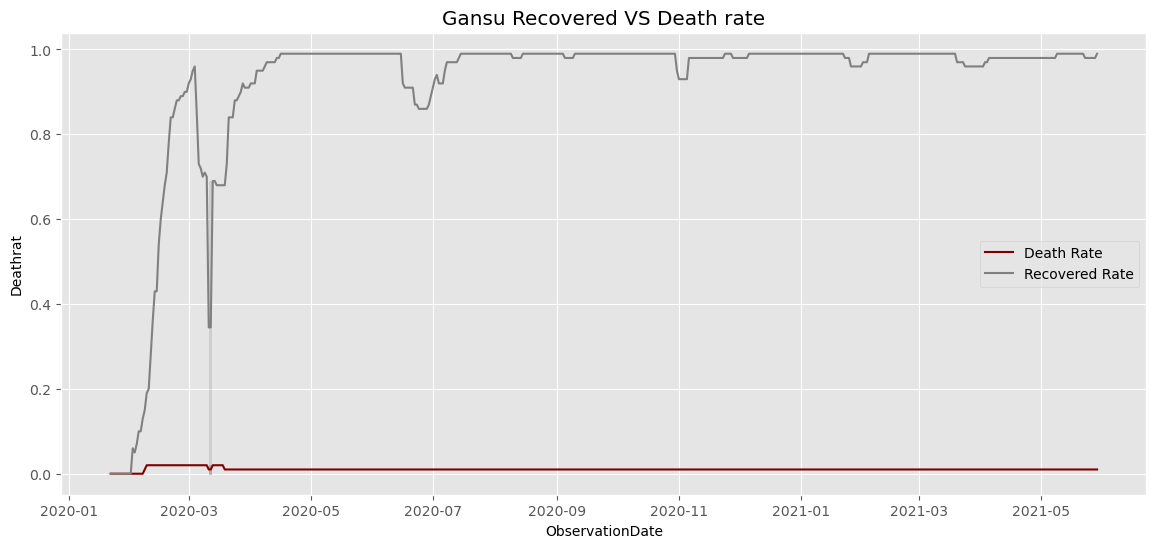

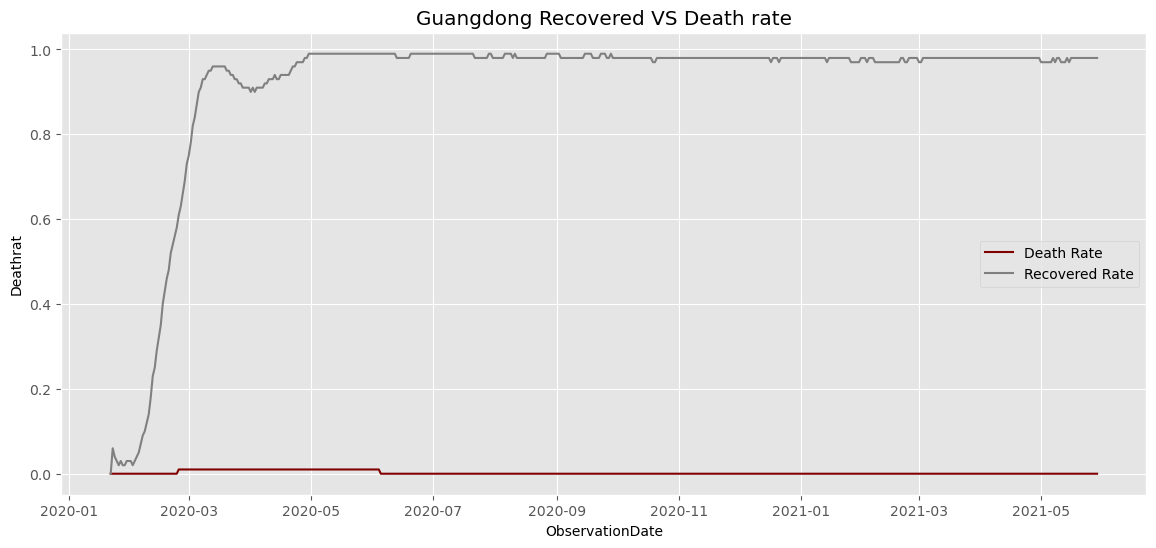

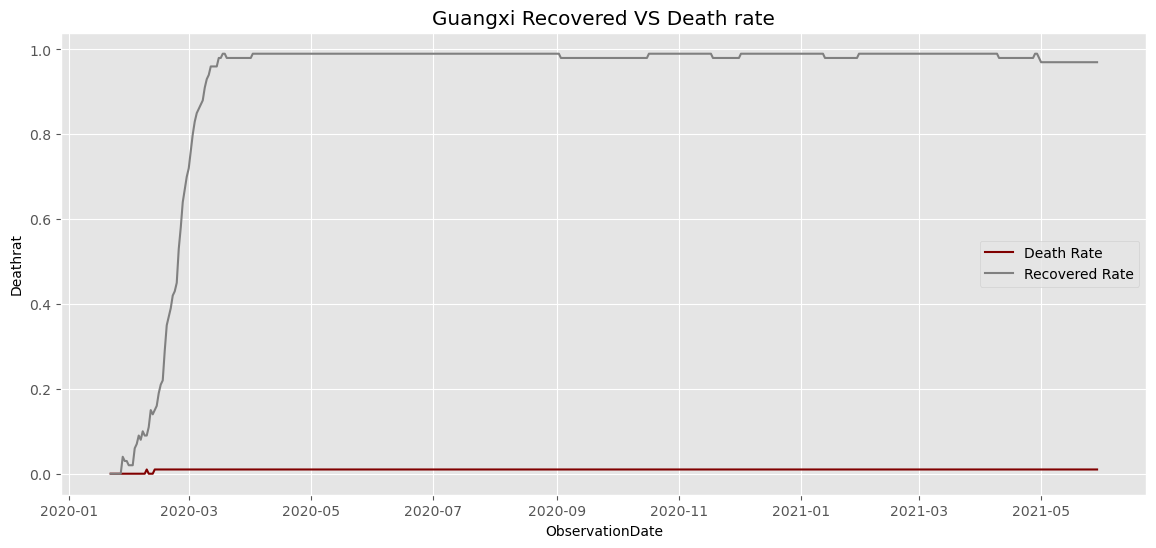

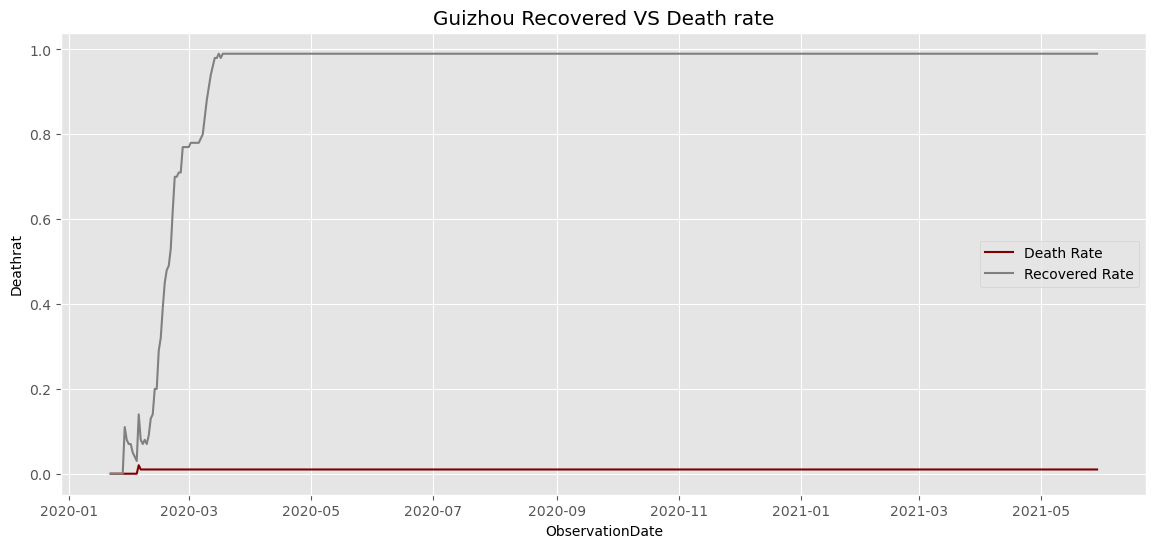

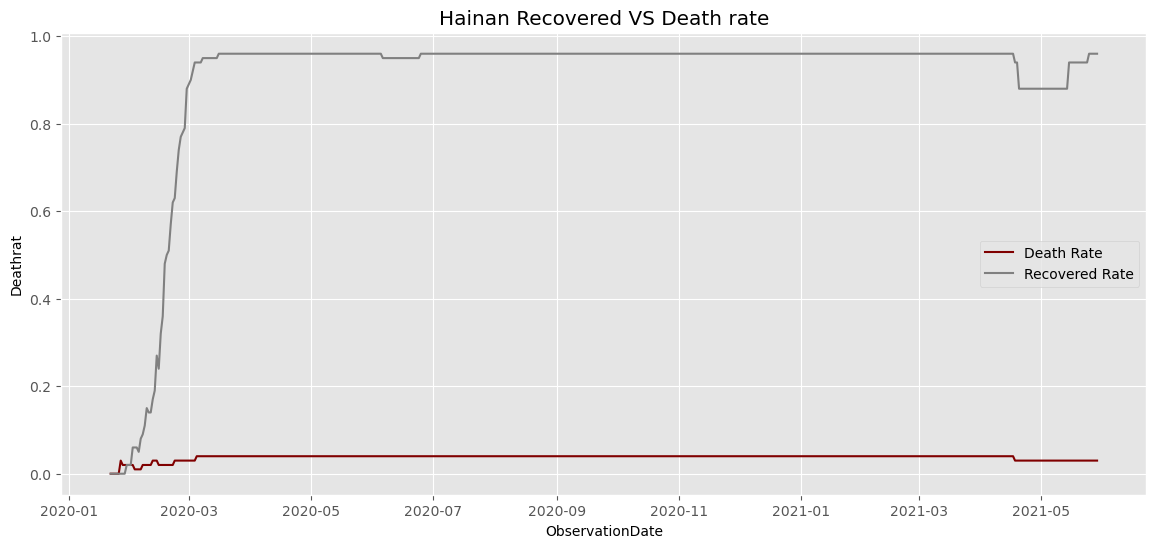

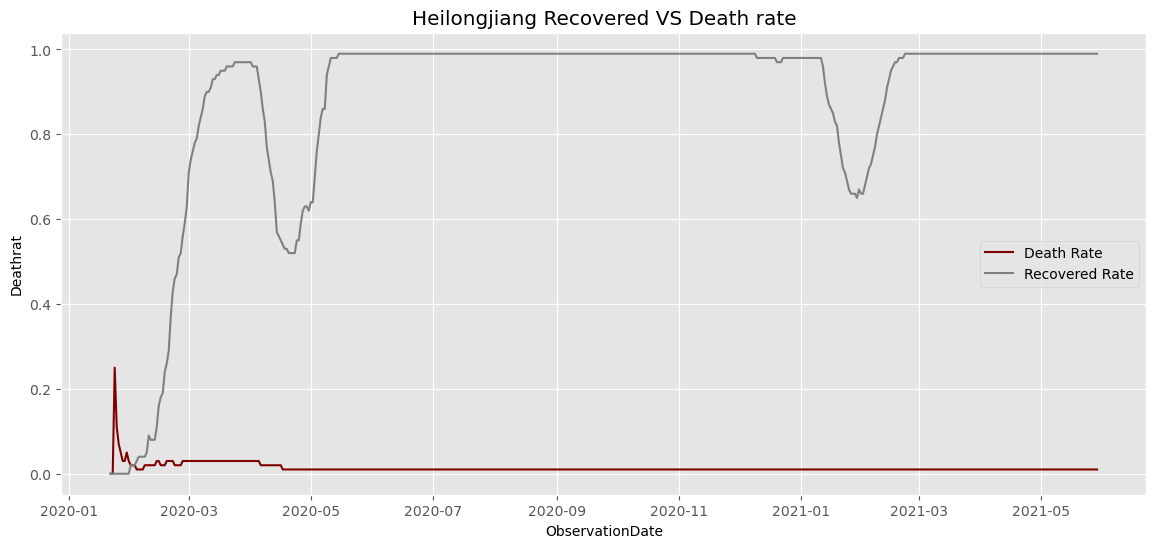

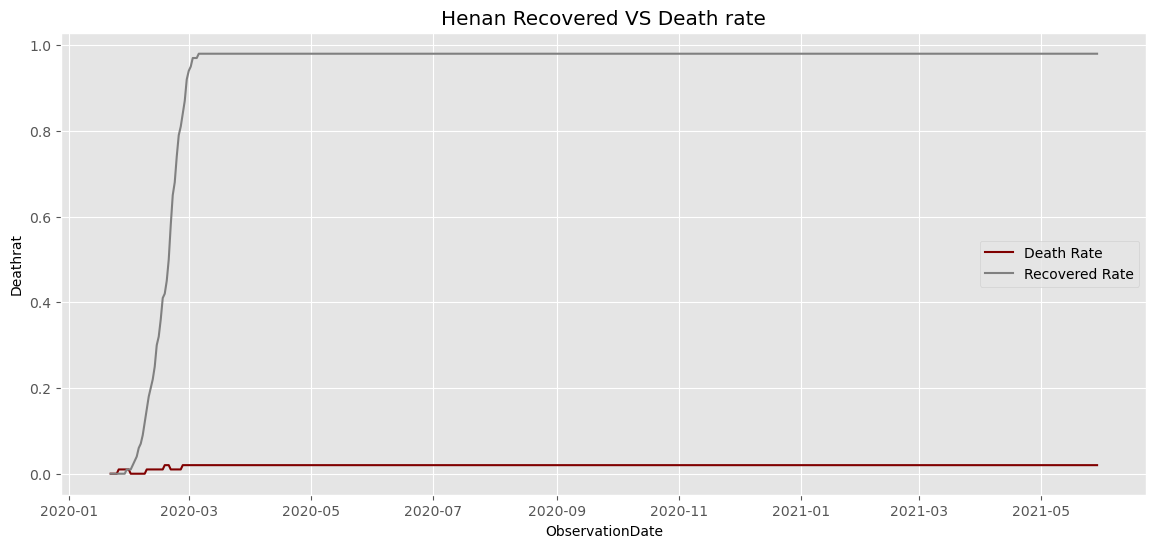

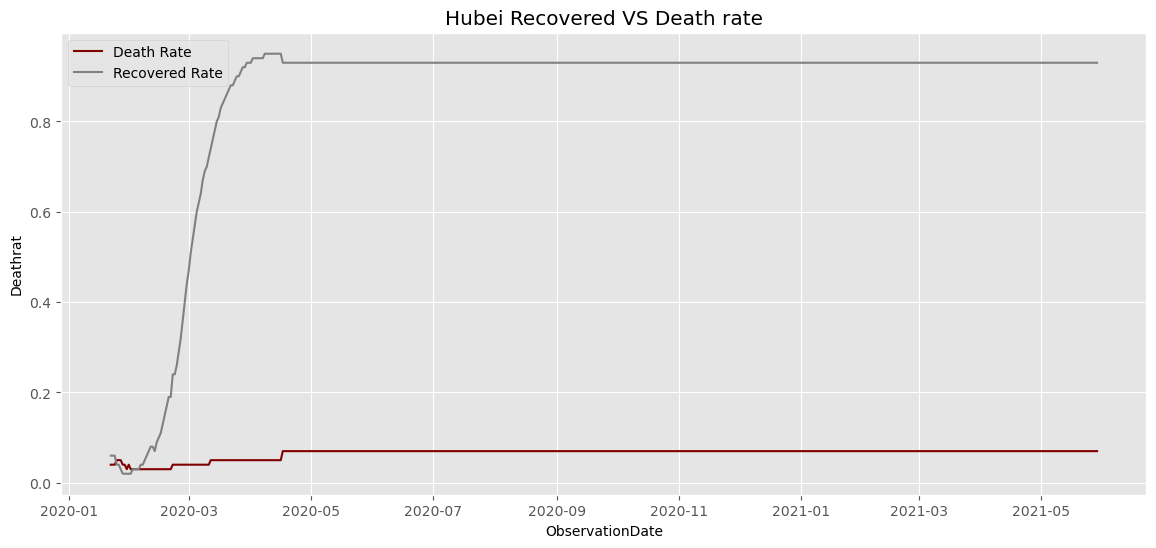

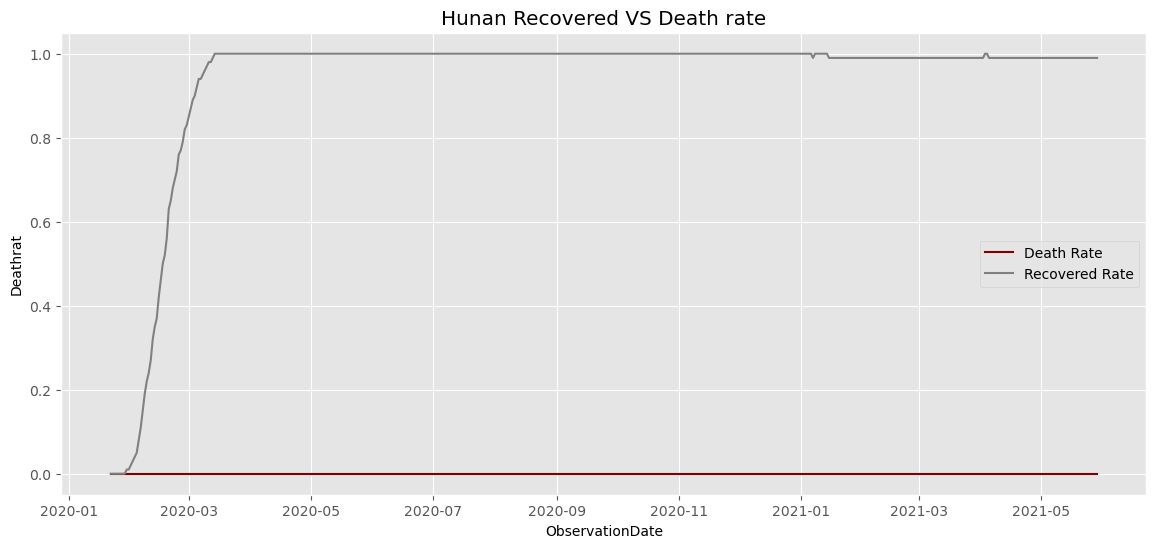

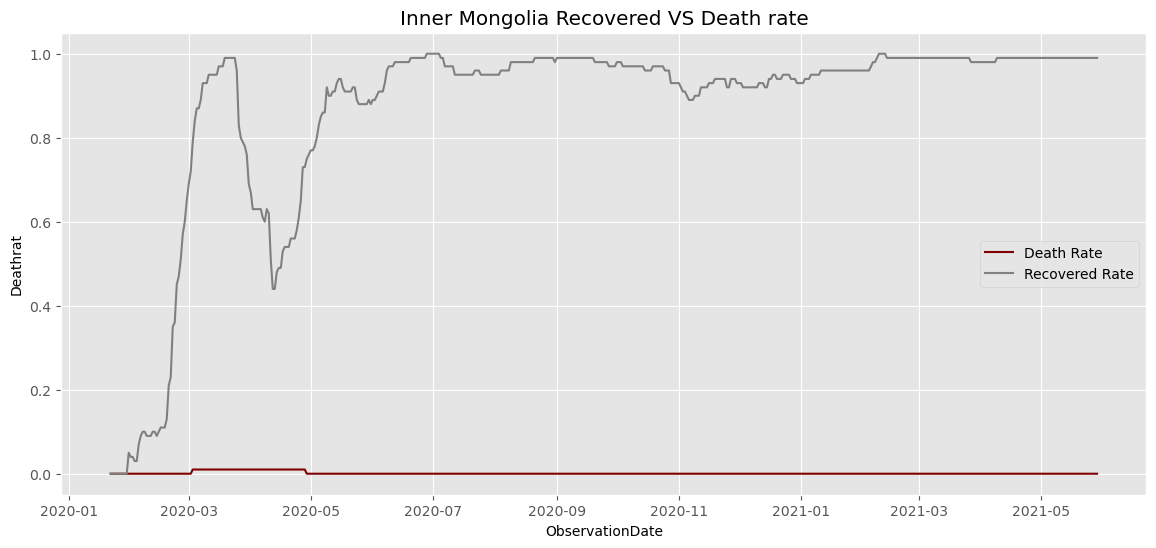

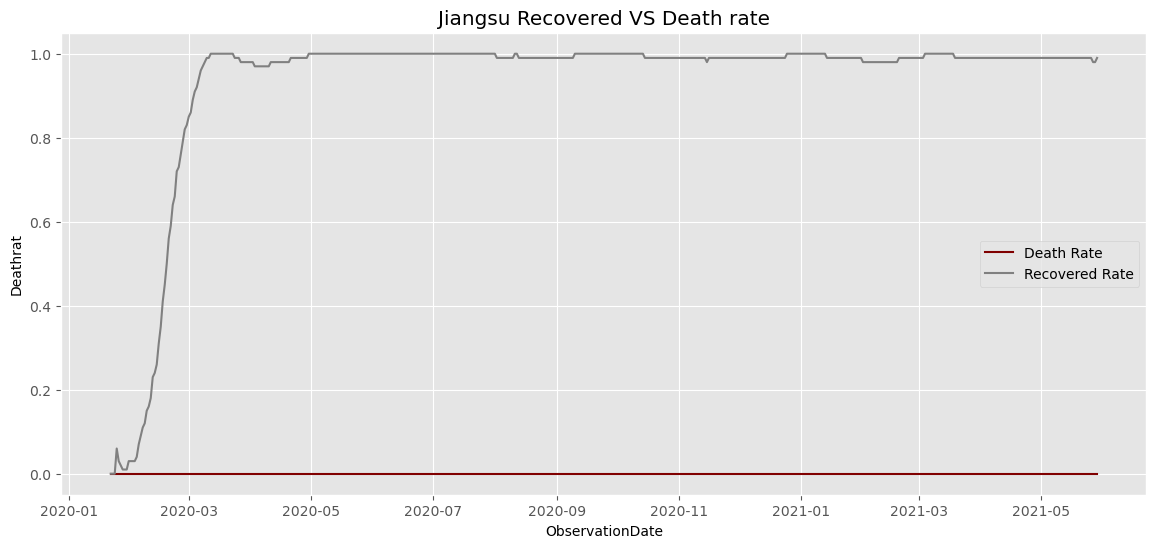

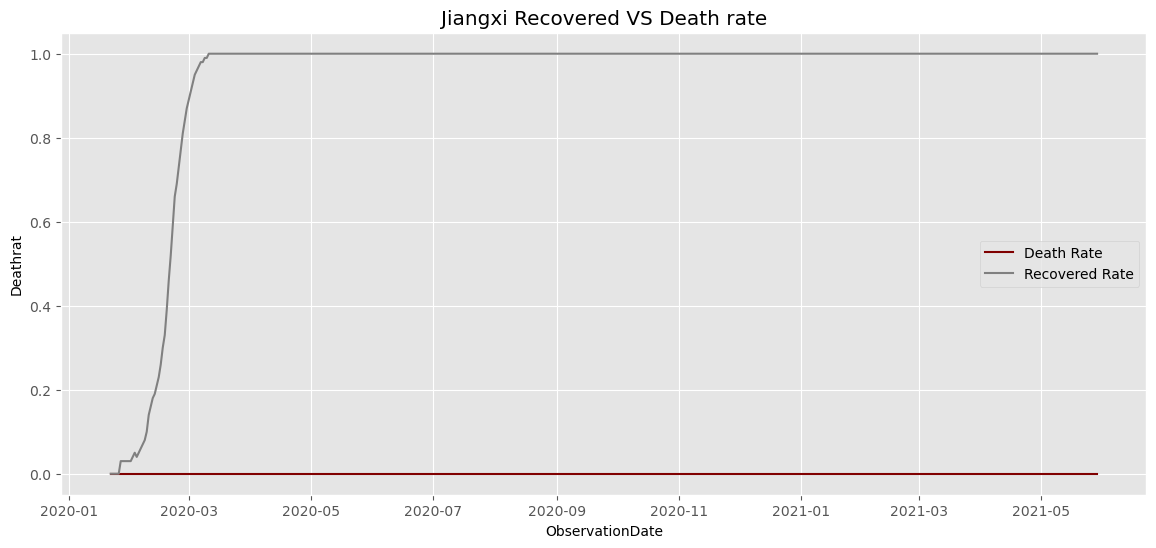

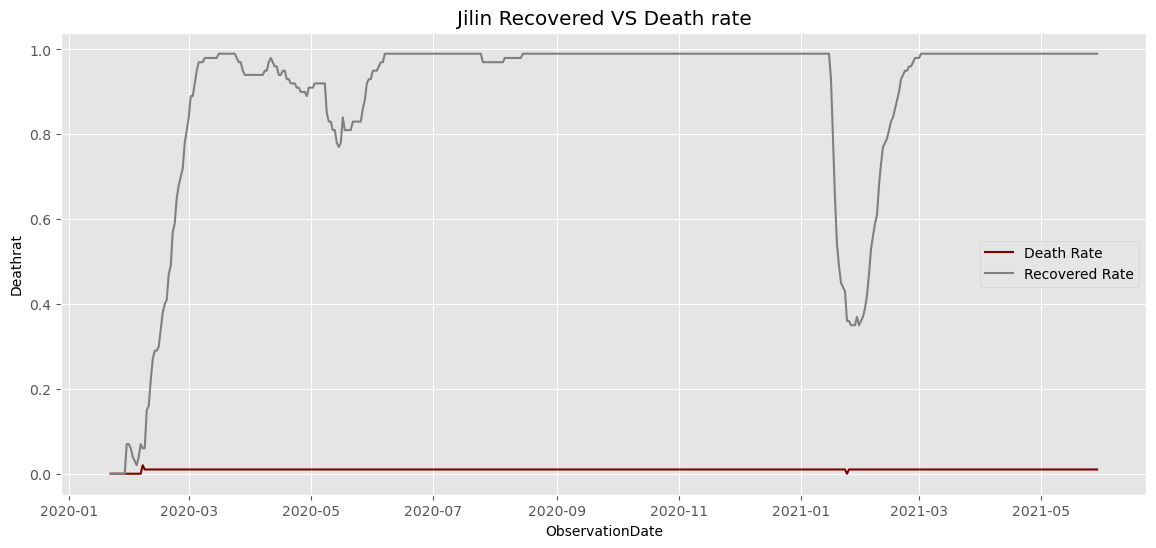

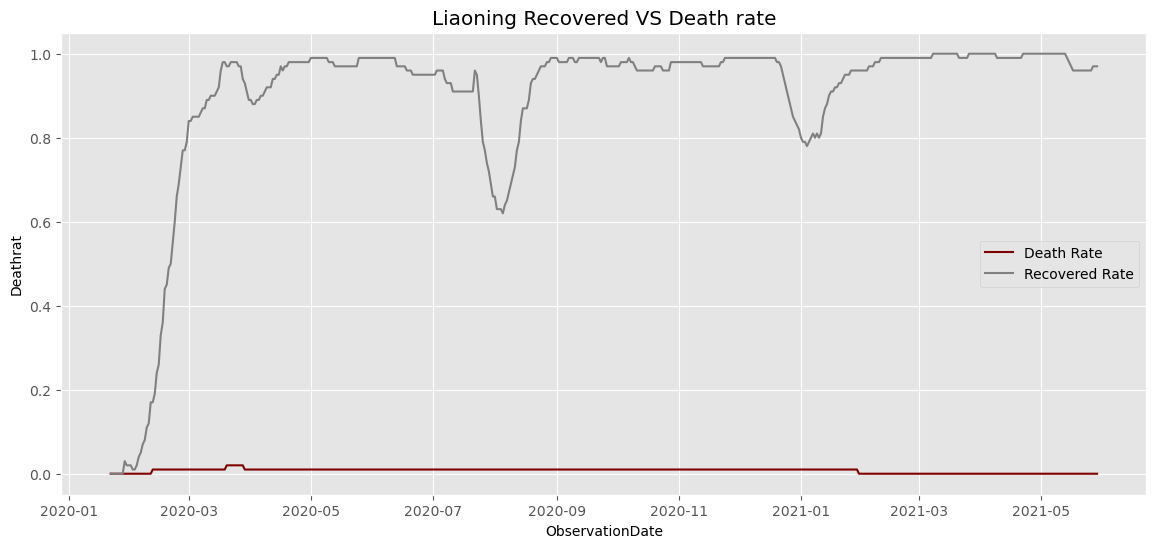

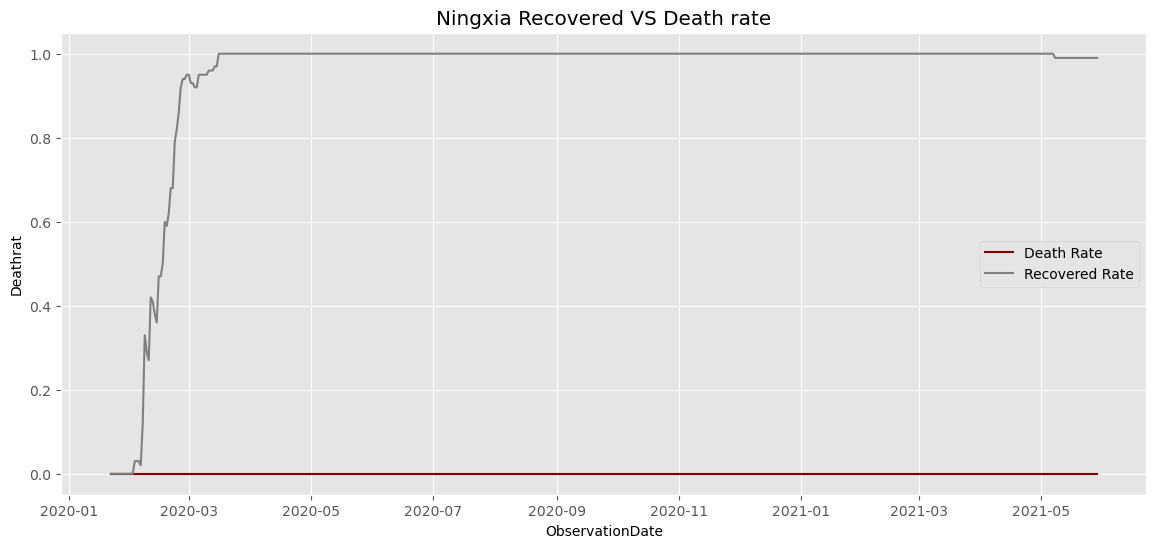

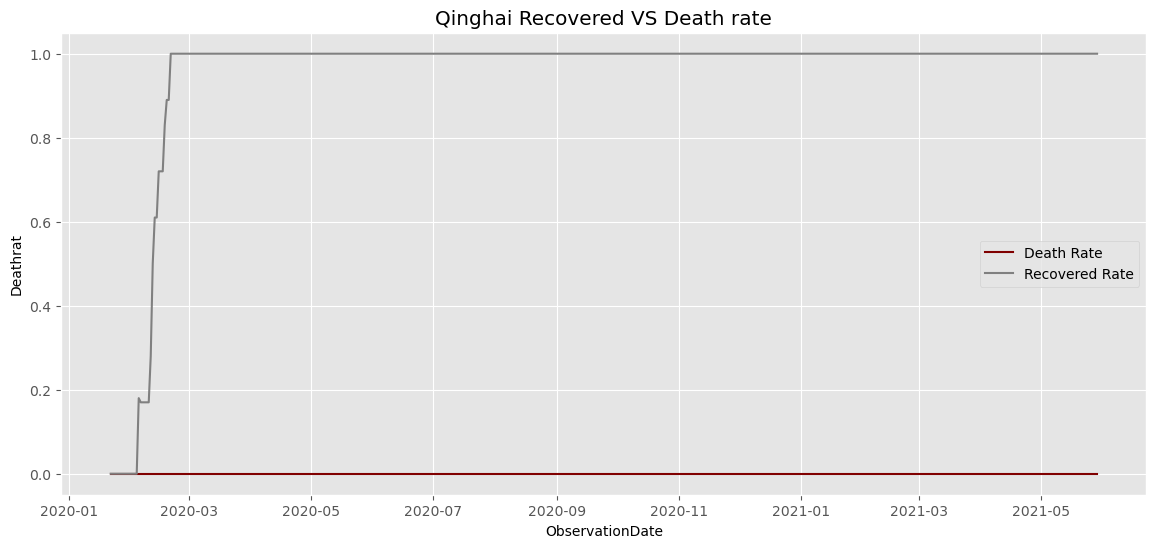

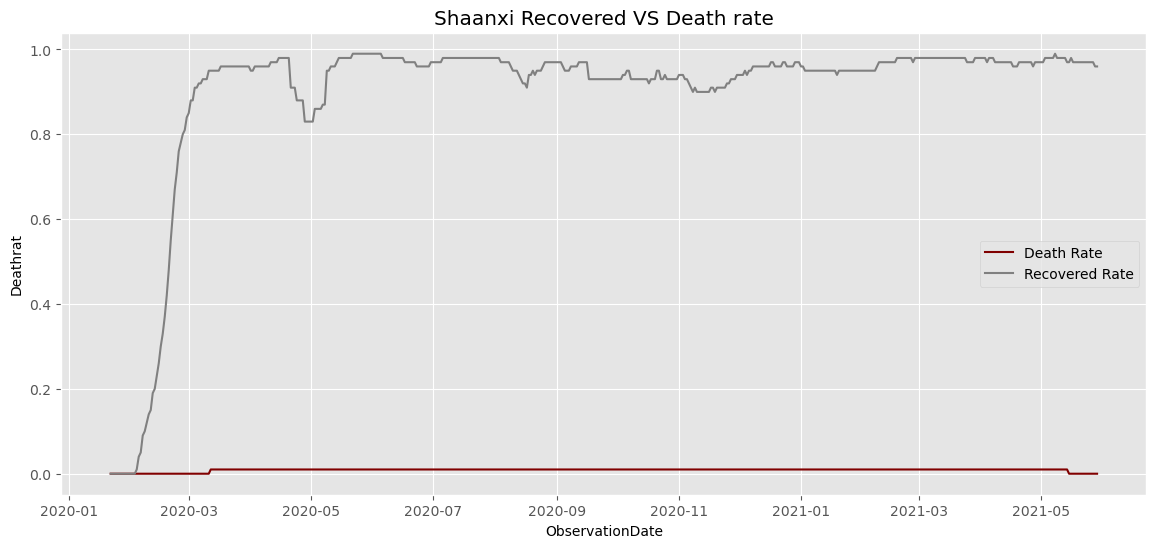

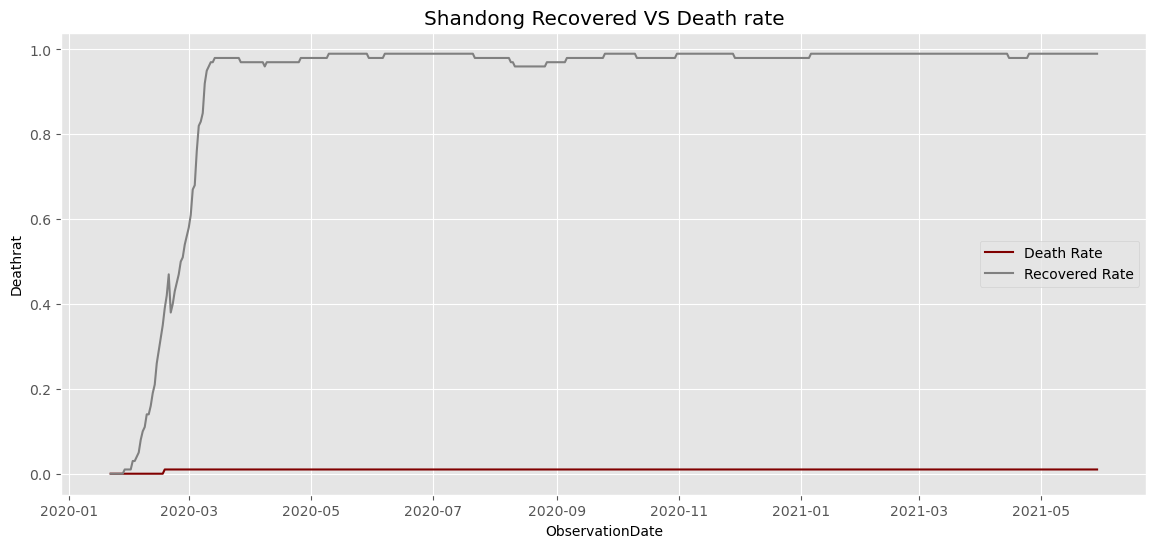

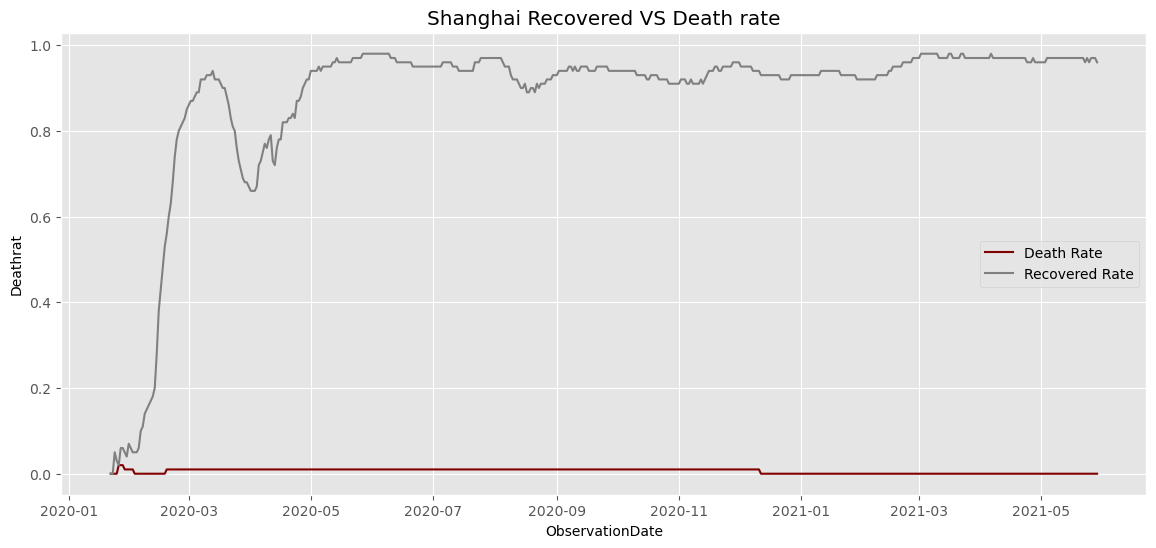

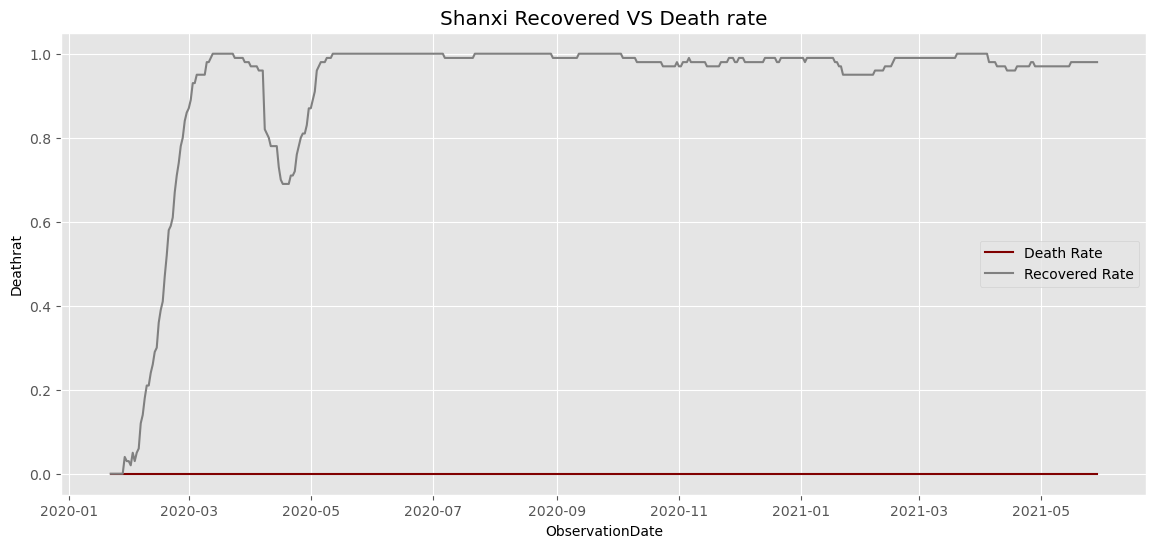

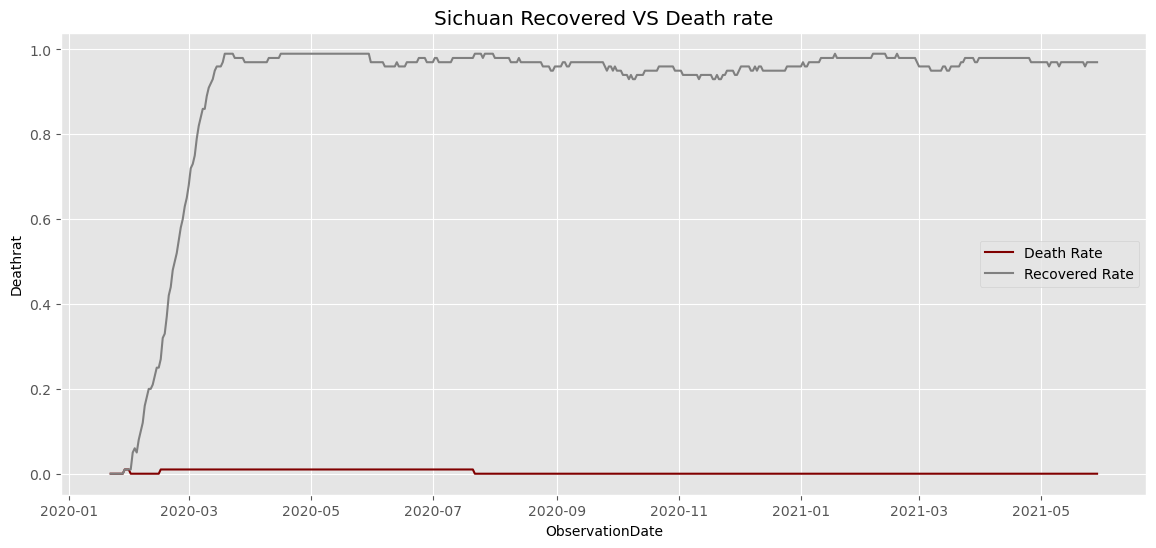

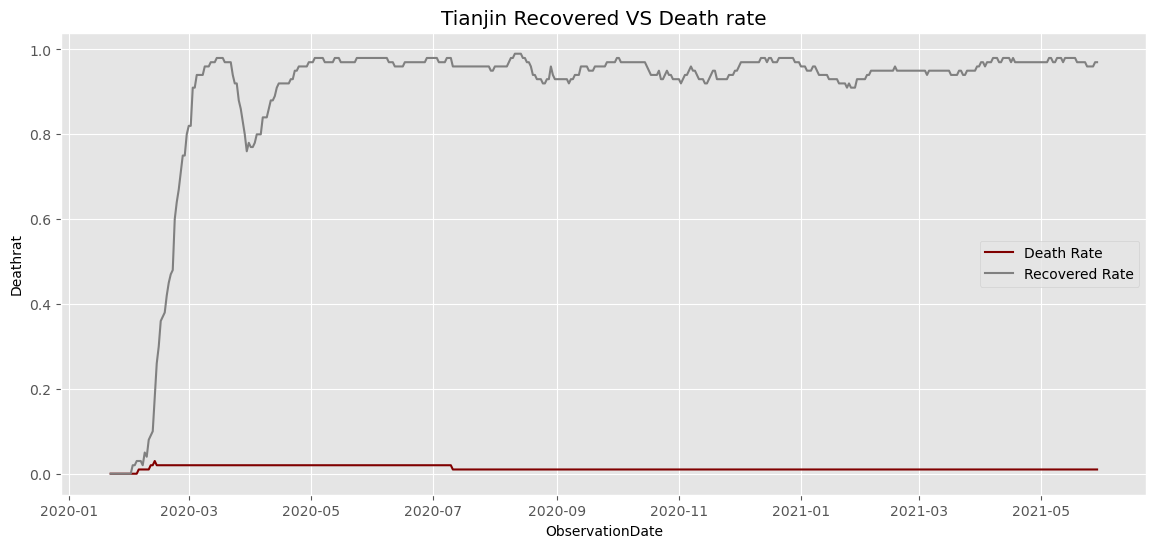

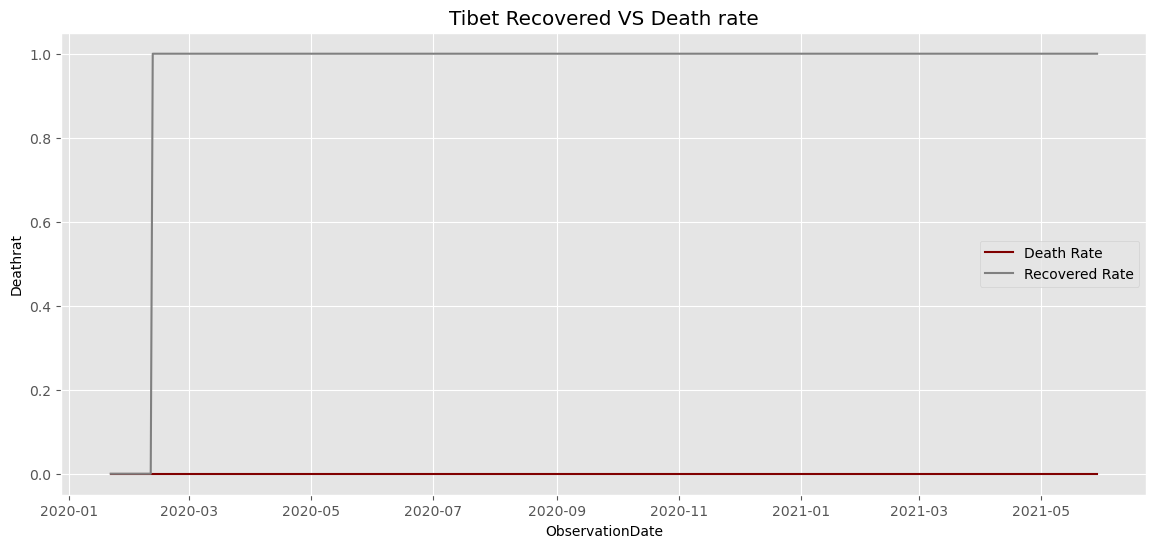

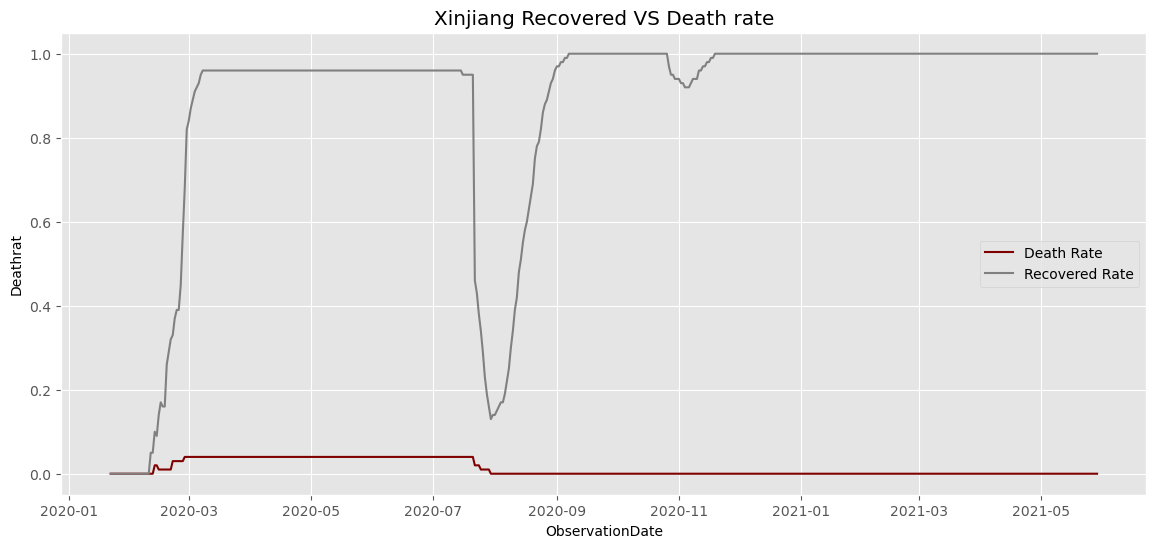

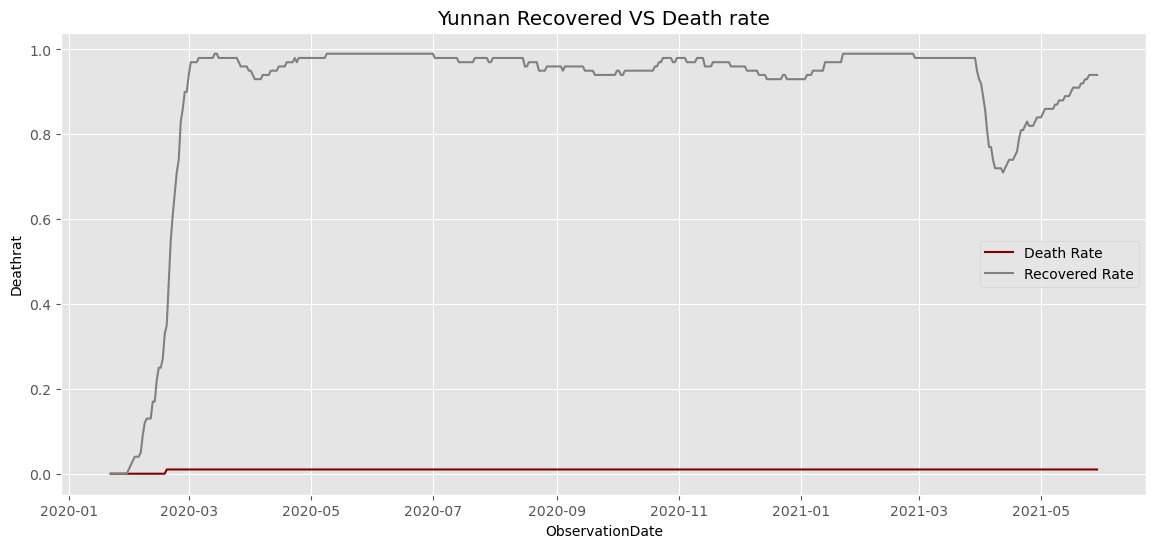

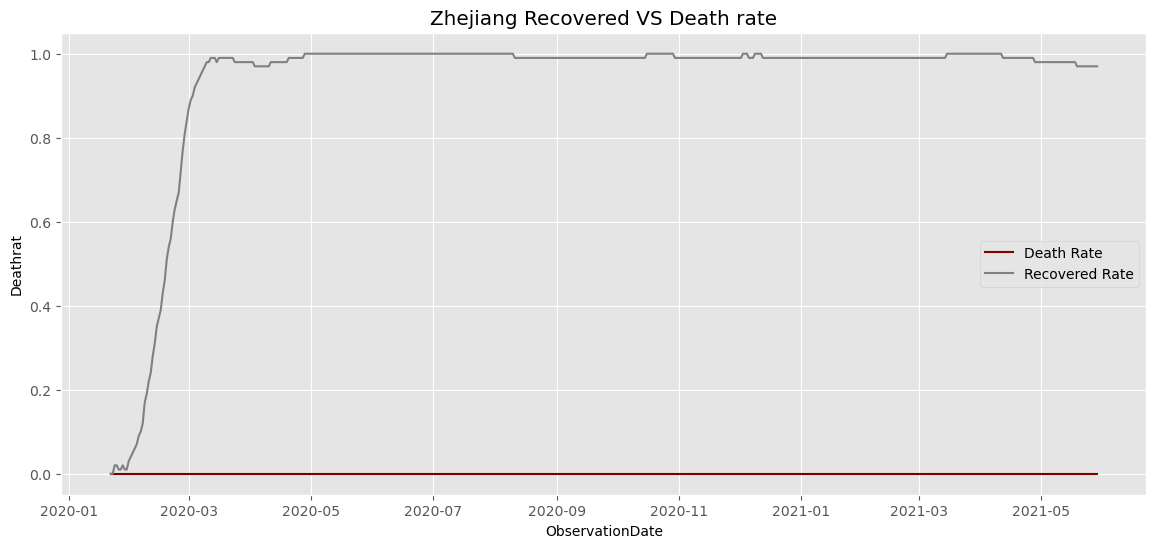

In [70]:
province=['Anhui', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang']
 
# for pro in province:
#         pro = covid_china[covid_china['Province/State'] == 'pro']
#         plt.figure(figsize=(14,6))
#         sns.lineplot(data=pro, x='ObservationDate', y='Deathrat', color="#808080")
#         sns.lineplot(data=pro, x='ObservationDate', y='Recoveredrat', color="#808080")
#         plt.title(f"{pro} Recovered VS Death rate")
        
for pro_name in province:
    pro_data = covid_china[covid_china['Province/State'] == pro_name]
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=pro_data, x='ObservationDate', y='Deathrat', color="#800000", label="Death Rate")
    sns.lineplot(data=pro_data, x='ObservationDate', y='Recoveredrat', color="#808080", label="Recovered Rate")
    plt.title(f"{pro_name} Recovered VS Death rate")
    plt.legend()
    plt.show()

### Then we can compare the whole China with other countries

In [79]:
covid

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Deathrat,Recoveredrat
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,0.00,0.00
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,0.00,0.00
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,0.00,0.00
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,0.00,0.00
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0,0.02,0.93
306425,306426,2021-05-29,Zeeland,Netherlands,29147.0,245.0,0.0,0.01,0.00
306426,306427,2021-05-29,Zhejiang,Mainland China,1364.0,1.0,1324.0,0.00,0.97
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0,0.02,0.96


In [76]:
covid_pivot2 = covid.groupby(['Country/Region','ObservationDate'])['Deathrat','Recoveredrat'].mean()
covid_pivot2

/var/folders/mq/6chk45p9099bllbg1_nny_bc0000gn/T/ipykernel_67046/1098316995.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_pivot2 = covid.groupby(['Country/Region','ObservationDate'])['Deathrat','Recoveredrat'].mean()


Deathrat  Recoveredrat
Country/Region                 ObservationDate                        
 Azerbaijan                    2020-02-28            0.0           0.0
('St. Martin',)                2020-03-10            0.0           0.0
Afghanistan                    2020-02-24            0.0           0.0
                               2020-02-25            0.0           0.0
                               2020-02-26            0.0           0.0
...                                                  ...           ...
occupied Palestinian territory 2020-03-12            0.0           0.0
                               2020-03-14            0.0           0.0
                               2020-03-15            0.0           0.0
                               2020-03-16            0.0           0.0
                               2020-03-17            0.0           0.0

[87281 rows x 2 columns]

In [77]:
covid_pivot2.reset_index(drop=False, inplace=True)

In [80]:
covid_pivot2

,Country/Region,ObservationDate,Deathrat,Recoveredrat
0,Azerbaijan,2020-02-28,0.0,0.0
1,"('St. Martin',)",2020-03-10,0.0,0.0
2,Afghanistan,2020-02-24,0.0,0.0
3,Afghanistan,2020-02-25,0.0,0.0
4,Afghanistan,2020-02-26,0.0,0.0
...,...,...,...,...
87276,occupied Palestinian territory,2020-03-12,0.0,0.0
87277,occupied Palestinian territory,2020-03-14,0.0,0.0
87278,occupied Palestinian territory,2020-03-15,0.0,0.0
87279,occupied Palestinian territory,2020-03-16,0.0,0.0


In [82]:
covid_pivot2['Country/Region'].value_counts()

Taiwan                              494
Macau                               494
Hong Kong                           494
South Korea                         494
Thailand                            494
Japan                               494
Kiribati                            494
US                                  494
Mainland China                      494
Vietnam                             493
Singapore                           493
France                              492
Australia                           492
Malaysia                            492
Nepal                               491
Canada                              490
Cambodia                            489
Sri Lanka                           489
Germany                             488
Philippines                         487
United Arab Emirates                487
Finland                             487
India                               486
UK                                  485
Russia                              485


In [83]:
covid_china2=covid_pivot2[covid_pivot2['Country/Region']=='Mainland China']
covid_china2

,Country/Region,ObservationDate,Deathrat,Recoveredrat
48373,Mainland China,2020-01-22,0.001290,0.001935
48374,Mainland China,2020-01-23,0.002581,0.005806
48375,Mainland China,2020-01-24,0.026333,0.006667
48376,Mainland China,2020-01-25,0.009333,0.007667
48377,Mainland China,2020-01-26,0.007667,0.005000
48378,Mainland China,2020-01-27,0.007667,0.006667
48379,Mainland China,2020-01-28,0.005333,0.008000
48380,Mainland China,2020-01-29,0.005000,0.014333
48381,Mainland China,2020-01-30,0.005161,0.015806
48382,Mainland China,2020-01-31,0.004516,0.019032


In [84]:
covid_us = covid_pivot2[covid_pivot2['Country/Region']=='US']
covid_us

,Country/Region,ObservationDate,Deathrat,Recoveredrat
81663,US,2020-01-22,0.000000,0.000000
81664,US,2020-01-23,0.000000,0.000000
81665,US,2020-01-24,0.000000,0.000000
81666,US,2020-01-25,0.000000,0.000000
81667,US,2020-01-26,0.000000,0.000000
81668,US,2020-01-27,0.000000,0.000000
81669,US,2020-01-28,0.000000,0.000000
81670,US,2020-01-29,0.000000,0.000000
81671,US,2020-01-30,0.000000,0.000000
81672,US,2020-01-31,0.000000,0.000000


In [85]:
covid_pivot2['Country/Region'].unique()

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethi

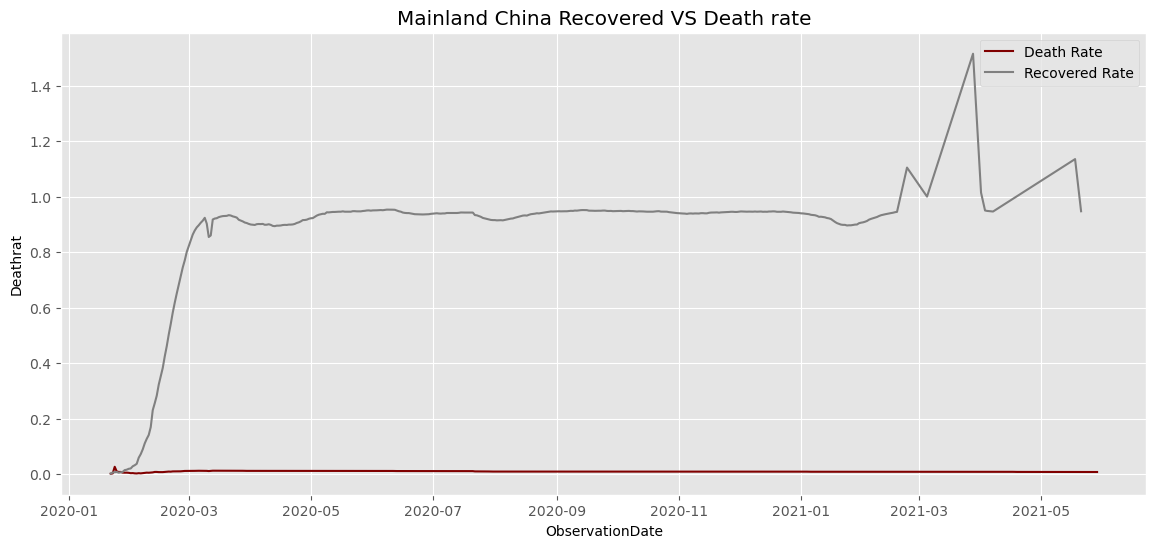

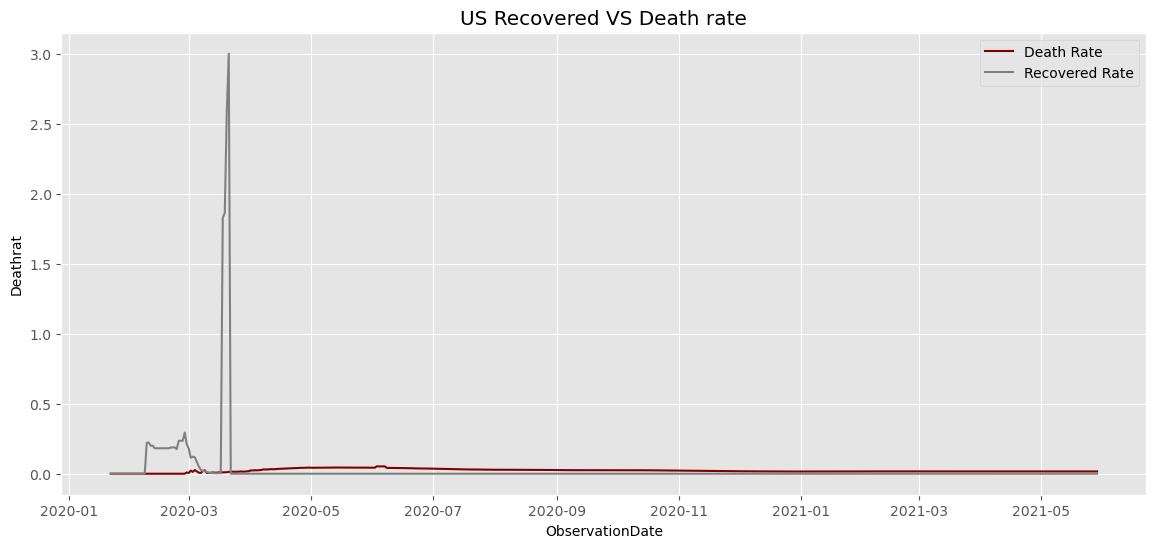

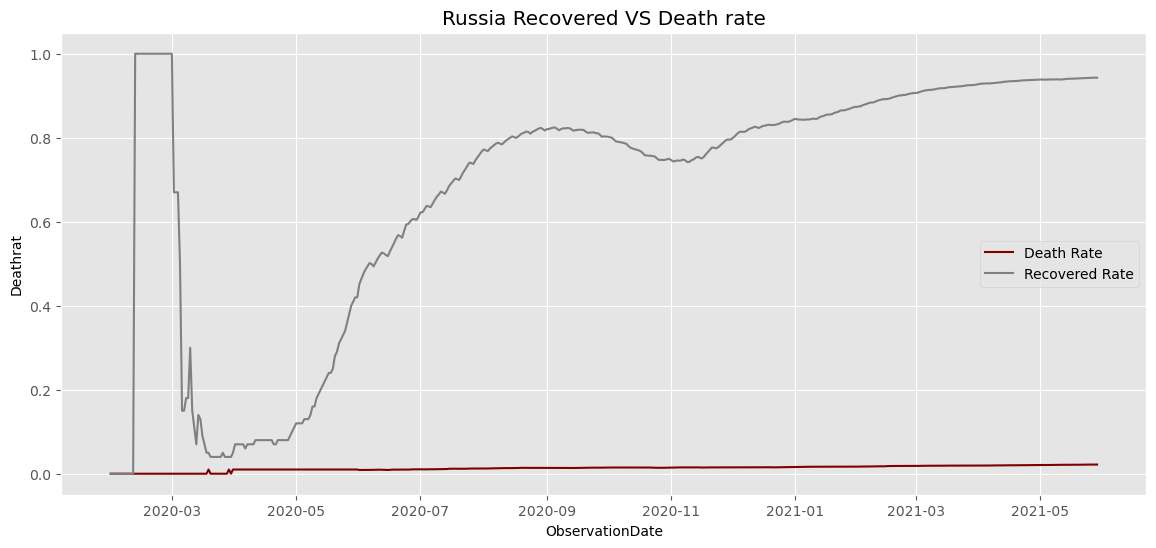

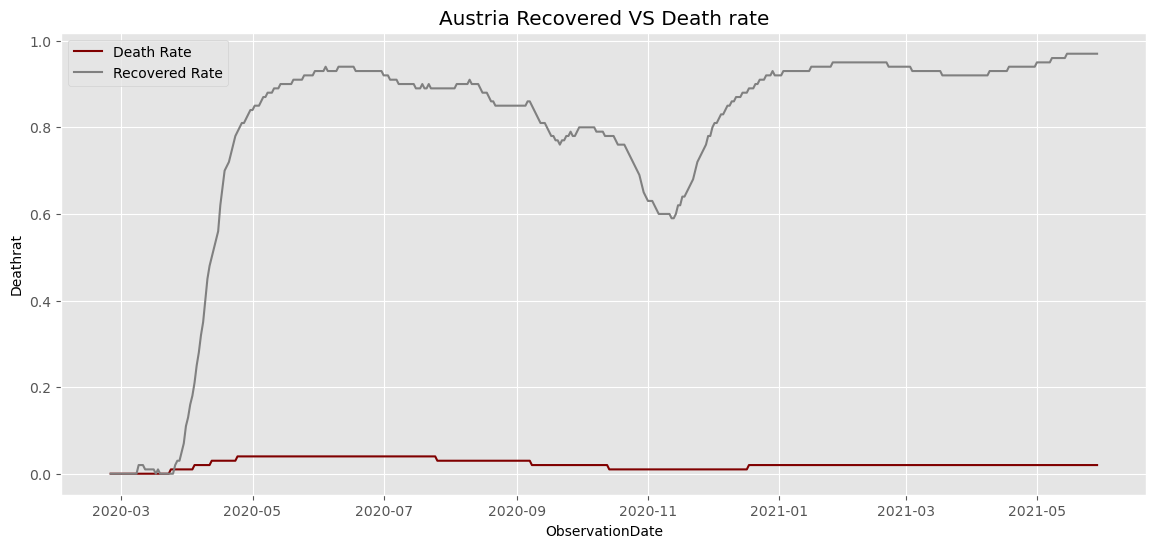

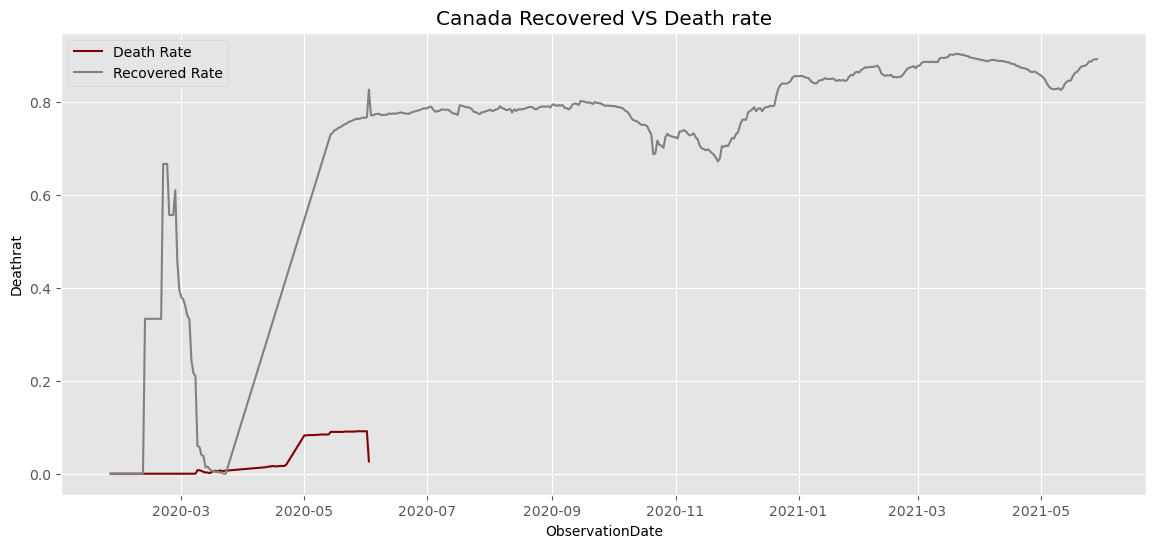

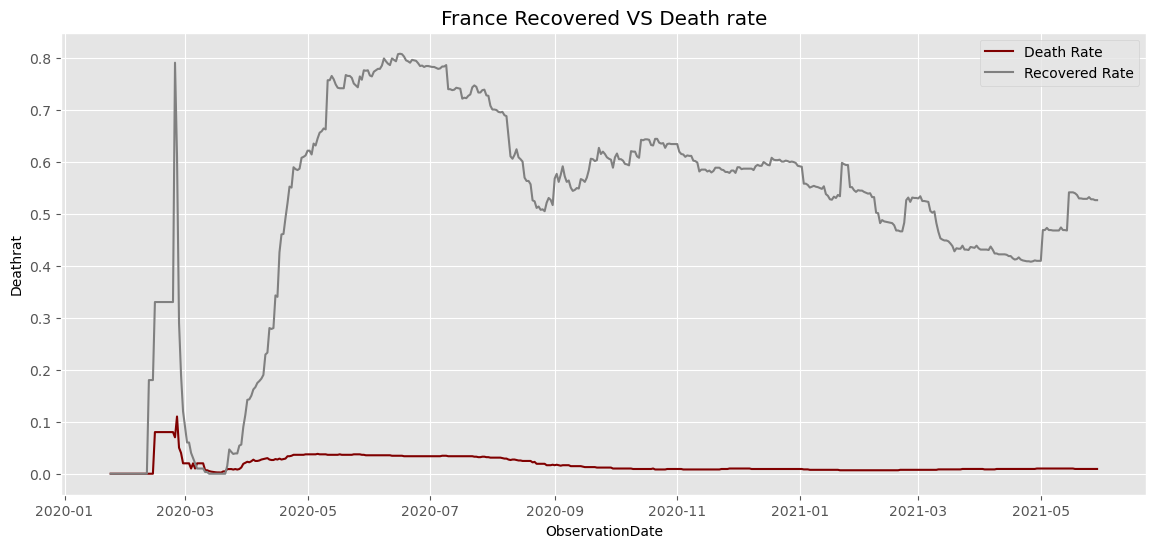

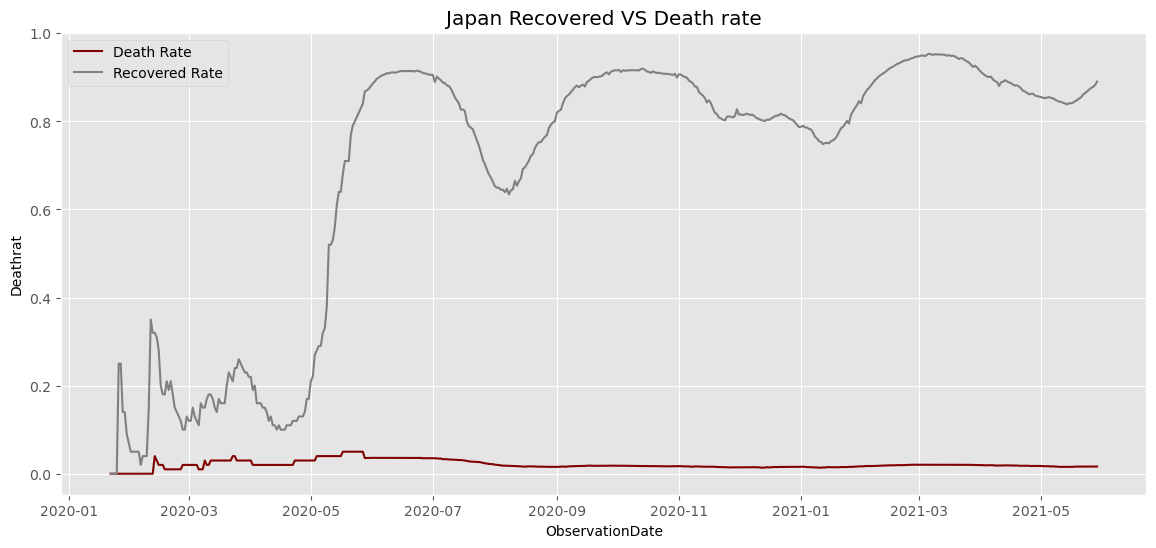

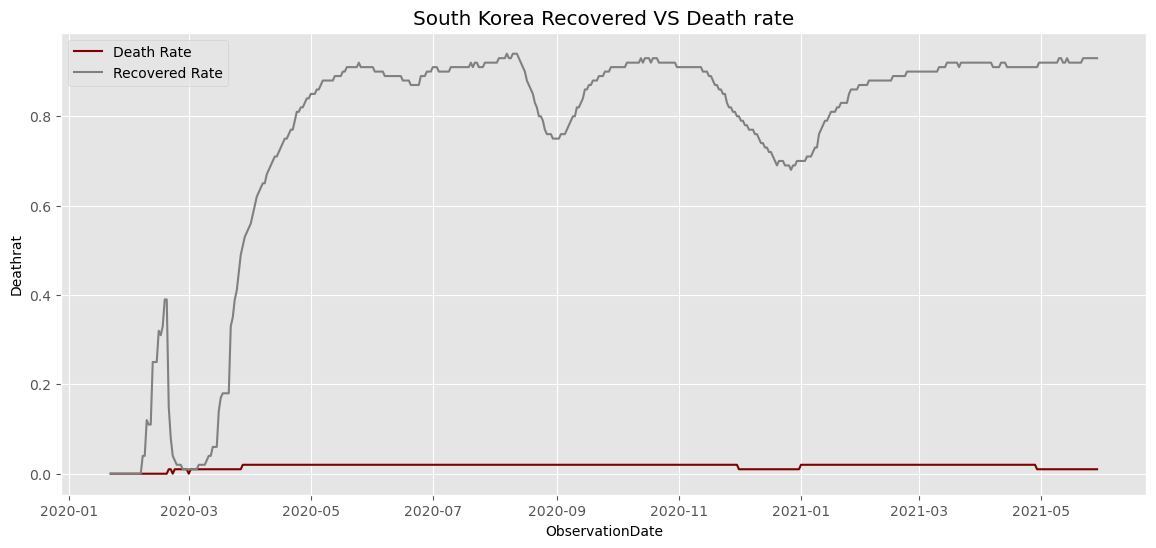

In [86]:
country = ['Mainland China','US','Russia','Austria','Canada','France','Japan','South Korea']

for coun_name in country:
    coun_data = covid_pivot2[covid_pivot2['Country/Region']== coun_name]
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=coun_data, x='ObservationDate', y='Deathrat', color="#800000", label="Death Rate")
    sns.lineplot(data=coun_data, x='ObservationDate', y='Recoveredrat', color="#808080", label="Recovered Rate")
    plt.title(f"{coun_name} Recovered VS Death rate")
    plt.legend()
    plt.show()
    

### the pattern are osme different among these countries , but all in all, the death rate is conspucuously low.